In [1]:
!pip install -q gradio
!pip install -q datasets
!pip install -q transformers
!pip install -q accelerate
!pip install -q evaluate
!pip install -q soundfile
!pip install -q speechbrain

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.5/16.5 MB 59.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.9/92.9 kB 11.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.7/302.7 kB 35.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.7/138.7 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 381.9/381.9 kB 22.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.7/59.7 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 55.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 kB 7.6 MB

In [2]:
from huggingface_hub import notebook_login

notebook_login()

In [3]:
model_id = "microsoft/speecht5_tts"
dataset_id = "lj_speech"

In [4]:
from datasets import load_dataset
import os

ljs = load_dataset(dataset_id, cache_dir = os.path.join("/tmp", dataset_id))
ljs

Generating train split:   0%|          | 0/13100 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['id', 'audio', 'file', 'text', 'normalized_text'],
        num_rows: 13100
    })
})

In [5]:
from datasets import Audio
ljs = ljs.cast_column("audio", Audio(sampling_rate = 16000))

In [6]:
ljs['train'][0]

{'id': 'LJ001-0001',
 'audio': {'path': '/tmp/lj_speech/downloads/extracted/b992b2eedc1e617c68a4bf44273be460546bfbaa50a8d9d73e87f780aa6002c4/LJSpeech-1.1/wavs/LJ001-0001.wav',
  'array': array([-0.00061751, -0.00074496, -0.00068972, ...,  0.00068615,
          0.00013802,  0.        ]),
  'sampling_rate': 16000},
 'file': '/tmp/lj_speech/downloads/extracted/b992b2eedc1e617c68a4bf44273be460546bfbaa50a8d9d73e87f780aa6002c4/LJSpeech-1.1/wavs/LJ001-0001.wav',
 'text': 'Printing, in the only sense with which we are at present concerned, differs from most if not from all the arts and crafts represented in the Exhibition',
 'normalized_text': 'Printing, in the only sense with which we are at present concerned, differs from most if not from all the arts and crafts represented in the Exhibition'}

In [7]:
# ljs = ljs["train"].train_test_split(seed = 0,shuffle=True, test_size=0.1)

In [8]:
ljs

DatasetDict({
    train: Dataset({
        features: ['id', 'audio', 'file', 'text', 'normalized_text'],
        num_rows: 13100
    })
})

In [9]:
ljs['train'][0]

{'id': 'LJ001-0001',
 'audio': {'path': '/tmp/lj_speech/downloads/extracted/b992b2eedc1e617c68a4bf44273be460546bfbaa50a8d9d73e87f780aa6002c4/LJSpeech-1.1/wavs/LJ001-0001.wav',
  'array': array([-0.00061751, -0.00074496, -0.00068972, ...,  0.00068615,
          0.00013802,  0.        ]),
  'sampling_rate': 16000},
 'file': '/tmp/lj_speech/downloads/extracted/b992b2eedc1e617c68a4bf44273be460546bfbaa50a8d9d73e87f780aa6002c4/LJSpeech-1.1/wavs/LJ001-0001.wav',
 'text': 'Printing, in the only sense with which we are at present concerned, differs from most if not from all the arts and crafts represented in the Exhibition',
 'normalized_text': 'Printing, in the only sense with which we are at present concerned, differs from most if not from all the arts and crafts represented in the Exhibition'}

In [10]:
from transformers import SpeechT5Processor, SpeechT5ForTextToSpeech

processor = SpeechT5Processor.from_pretrained(model_id)
model = SpeechT5ForTextToSpeech.from_pretrained(model_id)

preprocessor_config.json:   0%|          | 0.00/433 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/232 [00:00<?, ?B/s]

spm_char.model:   0%|          | 0.00/238k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/40.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/234 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/2.06k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/585M [00:00<?, ?B/s]

In [11]:
tokenizer = processor.tokenizer

In [12]:
def extract_all_chars(batch):
    all_text = " ".join(batch['text'])
    vocab = list(set(all_text))
    return {"vocab" : [vocab], "all_text" : [all_text]}



vocabs = ljs['train'].map(
    extract_all_chars,
    batched=True,
    batch_size = -1,
    keep_in_memory=True,
    remove_columns = ljs['train'].column_names,
)

dataset_vocab = set(vocabs["vocab"][0])
tokenizer_vocab = {k for k, _ in tokenizer.get_vocab().items()}


dataset_vocab - tokenizer_vocab


Map:   0%|          | 0/13100 [00:00<?, ? examples/s]

{' ',
 '$',
 '&',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '£',
 'à',
 'â',
 'è',
 'ü',
 '’',
 '“',
 '”'}

In [13]:
replacements = [
    ('à', 'a'),
    ('â', 'a'),
    ('è', 'e'),
    ('ü', 'u'),
    ('’', ' '),
    ('“', ' '),
    ('”', ' '),
    ('$', 'dollar'),
    ('&', 'and'),
    ('0', 'zero'),
    ('1', 'one'),
    ('2', 'two'),
    ('3', 'three'),
    ('4', 'four'),
    ('5', 'five'),
    ('6', 'six'),
    ('7', 'seven'),
    ('8', 'eight'),
    ('9', 'nine'),
]

def cleanup_text(inputs):
    for src, dst in replacements:
        inputs["text"] = inputs["text"].replace(src, dst)
    return inputs

ljs['train'] = ljs['train'].map(cleanup_text)

Map:   0%|          | 0/13100 [00:00<?, ? examples/s]

In [14]:
import os
import torch
from speechbrain.pretrained import EncoderClassifier

spk_model_name = "speechbrain/spkrec-xvect-voxceleb"

device = "cuda" if torch.cuda.is_available() else "cpu"

speaker_model = EncoderClassifier.from_hparams(
    source = spk_model_name,
    run_opts = {"device" : device},
    savedir = os.path.join("/tmp", spk_model_name)
)

def create_speaker_embedding(waveform):
    with torch.no_grad():
        speaker_embeddings = speaker_model.encode_batch(torch.tensor(waveform))
        speaker_embeddings = torch.nn.functional.normalize(speaker_embeddings, dim = 2)
        speaker_embeddings = speaker_embeddings.squeeze().cpu().numpy()
    return speaker_embeddings

hyperparams.yaml:   0%|          | 0.00/2.04k [00:00<?, ?B/s]

embedding_model.ckpt:   0%|          | 0.00/16.9M [00:00<?, ?B/s]

mean_var_norm_emb.ckpt:   0%|          | 0.00/3.20k [00:00<?, ?B/s]

classifier.ckpt:   0%|          | 0.00/15.9M [00:00<?, ?B/s]

label_encoder.txt:   0%|          | 0.00/129k [00:00<?, ?B/s]

In [15]:
def prepare_dataset(example):
    audio = example['audio']

    example = processor(
        text=example['text'],
        audio_target = audio['array'],
        sampling_rate = audio['sampling_rate'],
        return_attention_mask=False,
    )

    example['labels'] = example['labels'][0]

    example['speaker_embeddings'] = create_speaker_embedding(audio['array'])

    return example

In [16]:
ljs['train'][0]

{'id': 'LJ001-0001',
 'audio': {'path': '/tmp/lj_speech/downloads/extracted/b992b2eedc1e617c68a4bf44273be460546bfbaa50a8d9d73e87f780aa6002c4/LJSpeech-1.1/wavs/LJ001-0001.wav',
  'array': array([-0.00061751, -0.00074496, -0.00068972, ...,  0.00068615,
          0.00013802,  0.        ]),
  'sampling_rate': 16000},
 'file': '/tmp/lj_speech/downloads/extracted/b992b2eedc1e617c68a4bf44273be460546bfbaa50a8d9d73e87f780aa6002c4/LJSpeech-1.1/wavs/LJ001-0001.wav',
 'text': 'Printing, in the only sense with which we are at present concerned, differs from most if not from all the arts and crafts represented in the Exhibition',
 'normalized_text': 'Printing, in the only sense with which we are at present concerned, differs from most if not from all the arts and crafts represented in the Exhibition'}

In [17]:

processed_example = prepare_dataset(ljs['train'][0])

In [18]:
list(processed_example.keys())

['input_ids', 'labels', 'speaker_embeddings']

In [19]:

tokenizer.decode(processed_example["input_ids"])

'Printing, in the only sense with which we are at present concerned, differs from most if not from all the arts and crafts represented in the Exhibition</s>'

In [20]:
processed_example['speaker_embeddings'].shape

(512,)

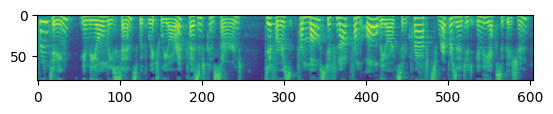

In [21]:
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(processed_example["labels"].T)
plt.show()

In [22]:
from transformers import SpeechT5HifiGan
vocoder = SpeechT5HifiGan.from_pretrained("microsoft/speecht5_hifigan")

config.json:   0%|          | 0.00/636 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/50.7M [00:00<?, ?B/s]

In [23]:
spectogram = torch.tensor(processed_example['labels'])
with torch.no_grad():
    speech = vocoder(spectogram)

In [24]:
from IPython.display import Audio
Audio(speech.cpu().numpy(),rate=16000)

In [25]:
from IPython.display import Audio
Audio(ljs['train'][0]['audio']['array'],rate=16000)

In [26]:
ljs = ljs['train'].map(
    prepare_dataset, remove_columns = ljs['train'].column_names
)

Map:   0%|          | 0/13100 [00:00<?, ? examples/s]

In [27]:
from functools import partial

model.config.use_cache = False

model.generate = partial(model.generate, use_cache=True)

In [34]:
from transformers import Seq2SeqTrainingArguments

training_args = Seq2SeqTrainingArguments(
    output_dir=f"speecht5_finetuned_{dataset_id}",  # change to a repo name of your choice
    per_device_train_batch_size=4,
    gradient_accumulation_steps=8,
    learning_rate=1e-5,
    warmup_steps=500,
    max_steps=400,
    gradient_checkpointing=True,
    fp16=True,
    evaluation_strategy="no",
    save_steps=1000,
    logging_steps=25,
    report_to=["tensorboard"],
    greater_is_better=False,
    label_names=["labels"],
    push_to_hub=True,
)

In [35]:
from dataclasses import dataclass
from typing import Any, Dict, List, Union

@dataclass
class TTSDataCollatorWithPadding:
    processor: Any

    def __call__(self, features: List[Dict[str, Union[List[int], torch.Tensor]]]) -> Dict[str, torch.Tensor]:

        input_ids = [{"input_ids": feature["input_ids"]} for feature in features]
        label_features = [{"input_values": feature["labels"]} for feature in features]
        speaker_features = [feature["speaker_embeddings"] for feature in features]

        # collate the inputs and targets into a batch
        batch = processor.pad(
            input_ids=input_ids,
            labels=label_features,
            return_tensors="pt",
        )

        # replace padding with -100 to ignore loss correctly
        batch["labels"] = batch["labels"].masked_fill(
            batch.decoder_attention_mask.unsqueeze(-1).ne(1), -100
        )

        # not used during fine-tuning
        del batch["decoder_attention_mask"]

        # round down target lengths to multiple of reduction factor
        if model.config.reduction_factor > 1:
            target_lengths = torch.tensor([
                len(feature["input_values"]) for feature in label_features
            ])
            target_lengths = target_lengths.new([
                length - length % model.config.reduction_factor for length in target_lengths
            ])
            max_length = max(target_lengths)
            batch["labels"] = batch["labels"][:, :max_length]

        # also add in the speaker embeddings
        batch["speaker_embeddings"] = torch.tensor(speaker_features)

        return batch

In [36]:
data_collator = TTSDataCollatorWithPadding(processor=processor)

In [37]:
from transformers import Seq2SeqTrainer

trainer = Seq2SeqTrainer(
    args=training_args,
    model=model,
    train_dataset=ljs,
    data_collator=data_collator,
    tokenizer=processor,
)

In [38]:
trainer.train()

Step,Training Loss
25,0.662700
50,0.661000
75,0.629600
100,0.614900
125,0.603300
150,0.587100
175,0.575400
200,0.571400
225,0.537700
250,0.510000


TrainOutput(global_step=400, training_loss=0.551657383441925, metrics={'train_runtime': 791.4612, 'train_samples_per_second': 16.173, 'train_steps_per_second': 0.505, 'total_flos': 1502569117082880.0, 'train_loss': 0.551657383441925, 'epoch': 0.98})

In [39]:
trainer.push_to_hub()

events.out.tfevents.1700812861.65bee39f8880.295.0:   0%|          | 0.00/6.19k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/578M [00:00<?, ?B/s]

spm_char.model:   0%|          | 0.00/238k [00:00<?, ?B/s]

Upload 5 LFS files:   0%|          | 0/5 [00:00<?, ?it/s]

training_args.bin:   0%|          | 0.00/4.79k [00:00<?, ?B/s]

events.out.tfevents.1700813023.65bee39f8880.295.1:   0%|          | 0.00/8.73k [00:00<?, ?B/s]

'https://huggingface.co/IHHI/speecht5_finetuned_lj_speech/tree/main/'